# Breast Cancer prediction 

In [2]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset using sklearn library

In [5]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [7]:
#Printing the attributes in cancer variable
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
#print(cancer['DESCR'])
#print(cancer['target'])
print(cancer['target_names'])
print('\n')
print(cancer['feature_names'])

['malignant' 'benign']


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
#Printing the shape of data
cancer['data'].shape

(569, 30)

# Creating dataframe using this data

In [22]:
df=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [23]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Part -I (Visualization)

/home/kamlesh/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


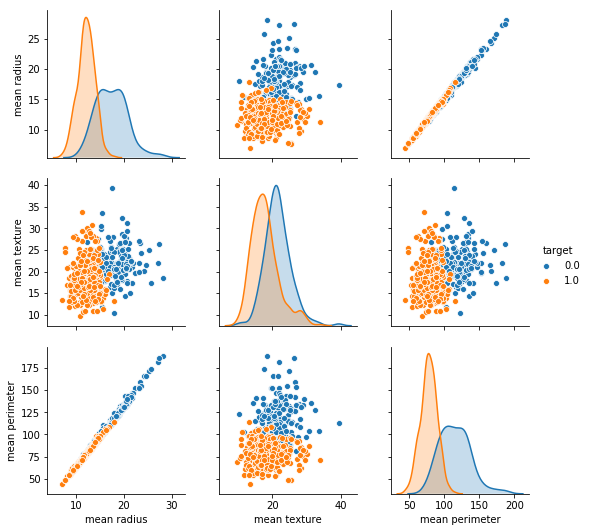

In [26]:
sns.pairplot(df,vars=['mean radius','mean texture','mean perimeter'],hue='target')

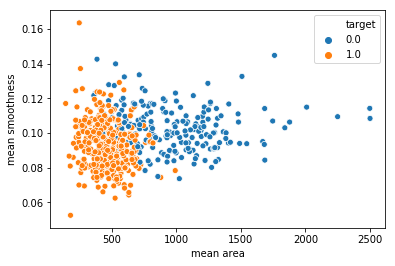

In [27]:
sns.scatterplot(x='mean area',y='mean smoothness',data=df,hue='target')

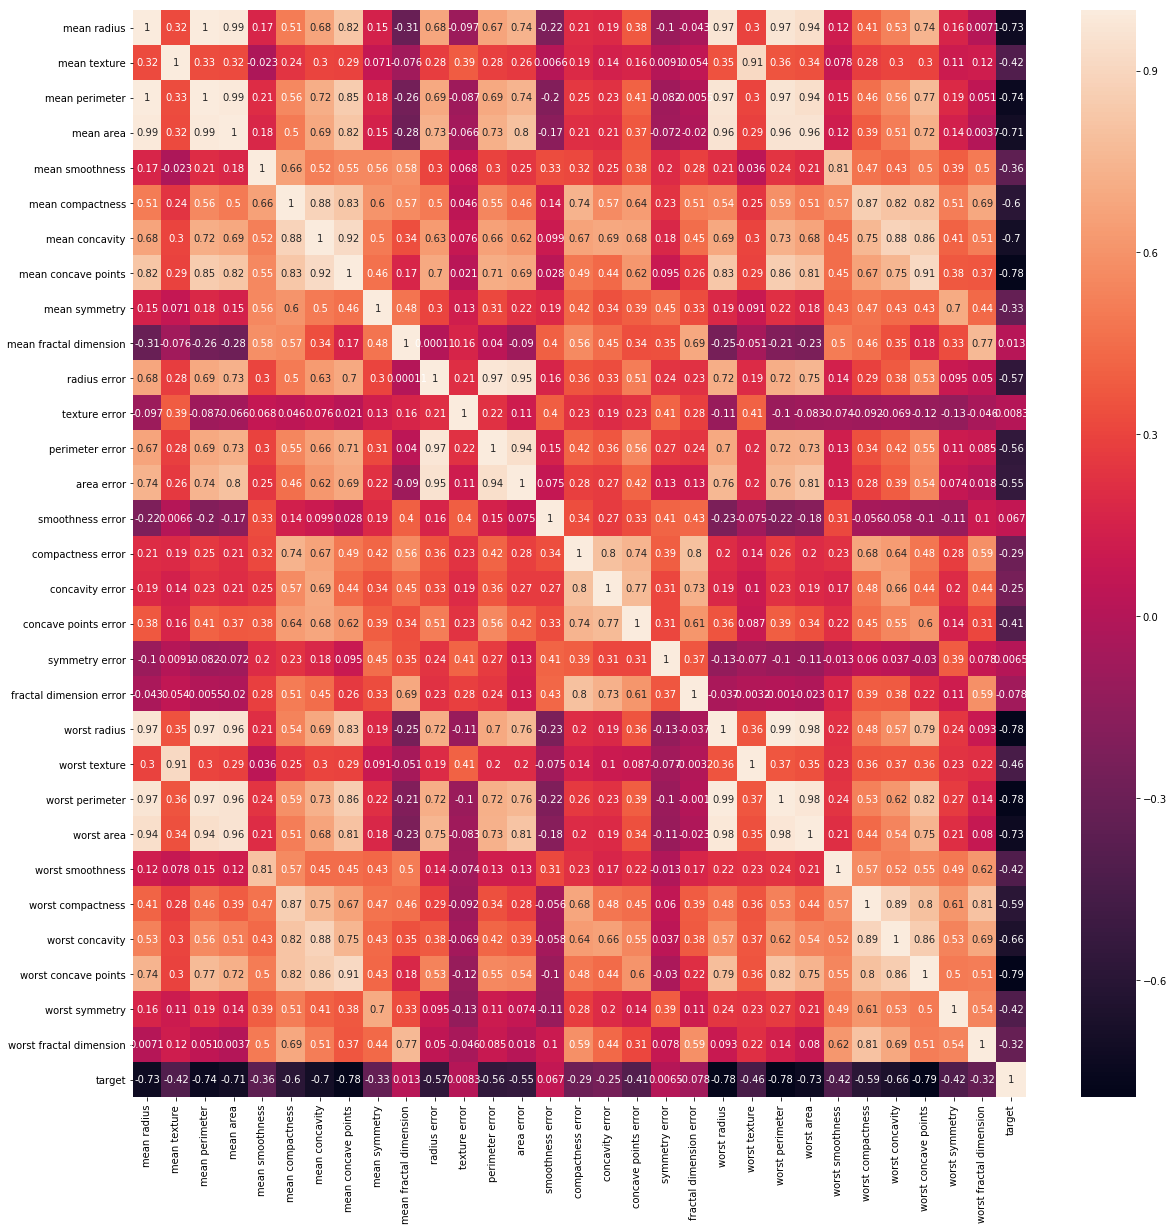

In [30]:
#Visualizing the correlation matrix to identify the interdependency of different attributes
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Part -II (Model training)

In [32]:
X=df.drop(['target'],axis=1)
y=df.target

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
print(x_train.shape)
print(x_test.shape)

(455, 30)
(114, 30)


In [38]:
# Importing SVM (support vector machine)
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
svc_model=SVC()
svc_model.fit(x_train,y_train)    #training the model using training data

/home/kamlesh/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
#Evaluating the model
y_predict=svc_model.predict(x_test)
cm=confusion_matrix(y_test,y_predict)

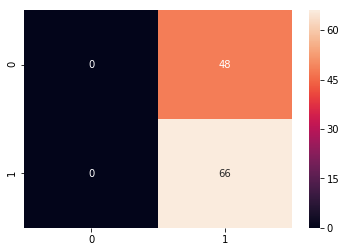

In [46]:
sns.heatmap(cm,annot=True)   #Here it can be clearly visualized that 48 data are misclassified 

There is huge misclassification in the prediction with 48 false misclassification

# Improving the model (parameter tunning)

# Part-1

In [48]:
min_train=x_train.min()
range_train=(x_train-min_train).max()

In [49]:
x_train_scaled=(x_train-min_train)/range_train

Here the mean area and smoothness is scaled down to 1 with same visualization


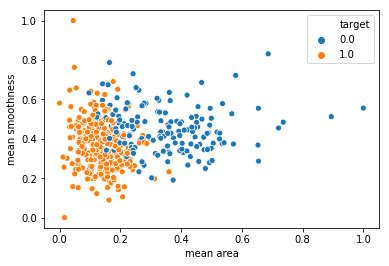

In [52]:
sns.scatterplot(x=x_train_scaled['mean area'],y=x_train_scaled['mean smoothness'],hue=y_train)
print("Here the mean area and smoothness is scaled down to 1 with same visualization")

In [53]:
#Note : Other way to scaling the data using sklearn

In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
x_train_scaled=min_max_scaler.fit_transform(x_train)

In [63]:
min_max_scaler=MinMaxScaler()
x_test_scaled=min_max_scaler.fit_transform(x_test)

In [64]:
#Again training the model

In [65]:
svc_model.fit(x_train_scaled,y_train)

/home/kamlesh/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [66]:
y_predict=svc_model.predict(x_test_scaled)

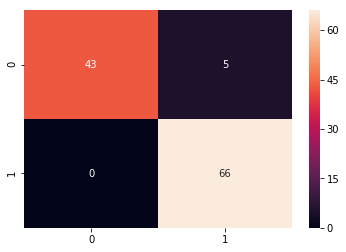

In [70]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

Now, the prediction is pretty good, there is only 5 misclassification

In [68]:
#printing classfication report

In [69]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Part -2

In [82]:
param_grid={'C':[0.1,1.0,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}  # creating dictionary 

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=4)

In [85]:
grid.fit(x_train_scaled,y_train)

/home/kamlesh/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1.0, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [87]:
grid.best_params_                             #printing the best parameter value

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

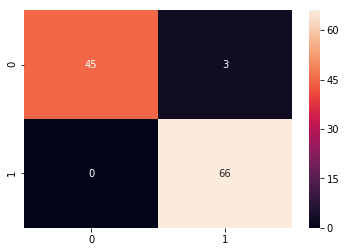

In [91]:
grid_prediction=grid.predict(x_test_scaled)
cm=confusion_matrix(y_test,grid_prediction)
sns.heatmap(cm,annot=True)

There is bit narrow down in misclassification. Now total no of misclassification is 3

In [92]:
print(classification_report(y_test,grid_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

